# Import Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


# Load each country data

In [5]:

benin_df = pd.read_csv('../data/benin-malanville_clean.csv')
sierra_df = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc_clean.csv')

# Add a column to identify each country's data
benin_df['country'] = 'Benin'
sierra_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

# Combine them
df_all = pd.concat([benin_df, sierra_df, togo_df], ignore_index=True)

df_all.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,country
1543512,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,Togo
1543513,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN,Togo
1543514,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN,Togo
1543515,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN,Togo
1543516,2022-10-25 00:00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN,Togo


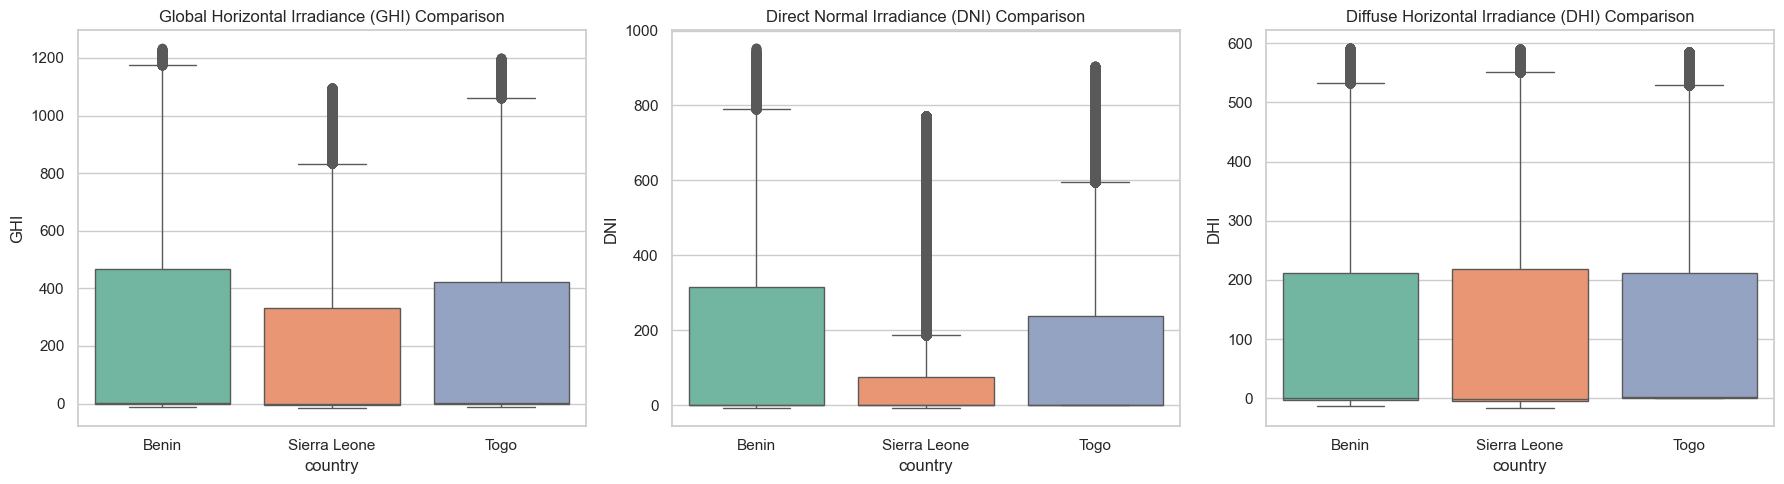

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))

# GHI boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x="country", y="GHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Global Horizontal Irradiance (GHI) Comparison")
plt.legend([],[], frameon=False)

# DNI boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x="country", y="DNI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Direct Normal Irradiance (DNI) Comparison")
plt.legend([],[], frameon=False)  

# DHI boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x="country", y="DHI", hue="country", data=df_all, palette="Set2", legend=False)
plt.title("Diffuse Horizontal Irradiance (DHI) Comparison")
plt.legend([],[], frameon=False) 

plt.tight_layout()
plt.show()

# Summary Table


In [ ]:
# Group by country and calculate mean, median, and standard deviation
summary_stats = df_all.groupby("country")[["GHI", "DNI", "DHI"]].agg(
    ["mean", "median", "std"]
).round(2)

summary_stats = summary_stats.transpose()

# Display the summary table
summary_stats

country      Benin  Sierra Leone    Togo
GHI mean    236.23        185.00  223.86
    median    0.70         -0.40    0.50
    std     328.29        279.02  317.31
DNI mean    166.90        104.13  147.98
    median   -0.10         -0.10    0.00
    std     262.08        200.95  247.68
DHI mean    111.66        108.10  112.78
    median    0.50         -0.60    1.50
    std     153.10        153.69  151.57

# Statistical Testing (One-way ANOVA)

In [ ]:

# Split GHI by country
ghi_benin = df_all[df_all["country"] == "Benin"]["GHI"].dropna()
ghi_sierra = df_all[df_all["country"] == "Sierra Leone"]["GHI"].dropna()
ghi_togo = df_all[df_all["country"] == "Togo"]["GHI"].dropna()

f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("✅ Result: There IS a statistically significant difference in GHI between countries.")
else:
    print("❌ Result: No statistically significant difference in GHI between countries.")


F-statistic: 3833.184
P-value: 0.00000
✅ Result: There IS a statistically significant difference in GHI between countries.


### 🔍 Key Observations from Cross-Country Comparison

1. **Togo** shows the **highest average GHI** among the three countries, indicating strong solar potential overall. It also displays relatively consistent values with moderate variability.

2. **Sierra Leone** presents the **lowest median and mean GHI**, suggesting comparatively weaker solar irradiance levels. However, it also has the **narrowest GHI range**, implying more stable solar conditions.

3. **Benin** falls between the two extremes — it has a good average GHI but shows the **highest variability**, which could indicate seasonal fluctuations or inconsistent weather conditions.


> 🧪 **ANOVA Results**:  
> F-statistic = *3833.184*
> P-value = *0*
> ✅ The p-value indicates that there is a **statistically significant difference** in GHI levels across the three countries, supporting the observed trends.

---



#  Visual Summary

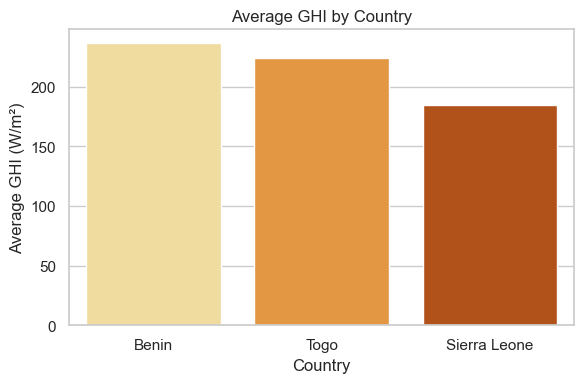

In [34]:
avg_ghi = df_all.groupby("country")["GHI"].mean().reset_index().sort_values(by="GHI", ascending=False)

# Plot with explicit hue assignment
plt.figure(figsize=(6, 4))
sns.barplot(data=avg_ghi, x="country", y="GHI", hue="country", palette="YlOrBr", legend=False)
plt.title("Average GHI by Country")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

